In [4]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [6]:
df = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin1', sep=';')

In [8]:
print(df)

         NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0        180007186625    2018                2       F              0.0   
1        180007186627    2018                3       F              0.0   
2        180007186628    2018                3       M              0.0   
3        180007186629    2018                2       F              0.0   
4        180007186631    2018               11       F              0.0   
...               ...     ...              ...     ...              ...   
5513728  180014002713    2018               11       F              0.0   
5513729  180014002715    2018                4       F              0.0   
5513730  180014002716    2018                5       M              0.0   
5513731  180014002721    2018                5       F              0.0   
5513732  180014002722    2018               11       M              1.0   

         TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                  4   

# Microdados ENEM

## Grupos de variaveis

- Dados do participante
- Dados da escola
- Dadps do local de aplicação da prova
- Dados da redação
- Dados do questionario socioeconomico

In [11]:
# 5 primeiras linha
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186625,2018,2,F,0.0,4,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,120.0,40.0,360.0,E,E,D,D,2,F,A,C,D,A,A,A,B,A,A,B,A,B,C,B,B,D,B,C,B,B,D
1,180007186627,2018,3,F,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503200,Igarapé-Açu,15,PA,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,40.0,40.0,160.0,40.0,420.0,D,E,A,A,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180007186628,2018,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,1.0,3155603,Rio Pardo de Minas,31,MG,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B,A,A,7,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
3,180007186629,2018,2,F,0.0,3,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,160.0,160.0,180.0,180.0,120.0,800.0,F,F,D,D,4,I,A,B,D,A,A,B,A,B,A,A,A,A,C,A,B,D,B,A,B,B,B
4,180007186631,2018,11,F,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2610905,Pesqueira,26,PE,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,100

In [13]:
# 5 ultimas linhas
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
5513723,180014002698,2018,7,M,0.0,3,1,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,D,B,A,C,A,B,A,A,A
5513724,180014002707,2018,6,F,0.0,2,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5208707,Goiânia,52,GO,1.0,1.0,1.0,1.0,448.0,453.0,458.0,460.0,483.8,561.6,535.7,407.5,EABDEDCDBDDCDDDCCCCDDDAAAAABBBDDCCCDDDDDDDDDD,DACCDCDADCEBDADAABCDACADCBEBADEAADDCDCABAEDDD,99999DECBBACDAEEBECBCCEDABACBABABECBCBAEAEACDB...,AAAAAEEEEEECDCDBBEEDDDDEEEEBEEABEEEEDCBEEBBBB,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,40.0,40.0,120.0,60.0,380.0,E,E,F,D,2,C,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A
5513725,180014002709,2018,8,F,0.0,2,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,4,H,A,C,D,B,A,B,B,B,B,B,A,A,C,A,B,E,B,C,B,A,A
5513726,180014002710,2018,6,M,0.0,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3118601,Contagem,31,MG,1.0,1.0,1.0,1.0,450.0,453.0,458.0,461.0,462.7,599.0,420.6,546.6,AAACBCCDEACAADBAECEACEDBABACEDDABCCBABDADCBCC,DCBBDEEABACBEDCAEEBAEDAAAACBECEEADCEBABCDBCBE,ACABB99999ABCBECBAAACEADBADBCEEDCADADAAEEACBAD...,BECECECABBAECDDACBCBCABDABBDCBBCAACDABCDCDDBB,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,120.0,80.0,80.0,100.0,20.0,400.0,B,E,F,F,4,D,A,C,D,B,A,B,B,B,A,B,A,A,B,A,B,D,B,B,B,A,A
5513727,180014002711,2018,14,F,0.0,1,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,1.0,1.0,1.0,1.0,448.0,451.0,455.0,460.0,474.9,603.3,467.1,497.9,ACBCEAEAABBBCEBBABBCBBEDDCABCBBBBACBBDACAAECC,ABAEBAEAECBEAEAEAEAAAACCEBBBDCEAEBBACDCAAEAEA,99999AECABDAAEBBACAAABECBABADDEDAEABBCAEAABCEB...,DADDEBBCDAAEDABDBEACEDAEACEDCDCBEDCAACADCEDDD,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,40.0,40.0,60.0,20.0,300.0,H,C,D,B,5,D,A,C,C,A,A,B,A,B,B,B,A,B,D,B,B,E,B,B,B,A,B
5513728,180014002713,2018,11,F,0.0,2,2,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2901007,Amargosa,29,BA,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,489.3,602.3,515.1,431.7,ABAAEEEBECBBBBCCDAEEBDDCDEBDDAAEBDCDDCBEDACDA,AADEDEAAEEAAECDCBDAABAAEDEACABCABBEDAEEABBCCA,99999EBAADABBEBABACCDBCBEBBAEAABBBEADABBEDCEBA...,BBDDEBADCDBDDECCACABEEBDEDABCCEBDDEDECBCCCEBE,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,40.0,40.0,120.0,20.0,360.0,E,E,B,B,2,B,A,B,D,A,A,B,A,A,A,A,A,A,A,A,A,C,A,B,B,A,A
5513729,180014002715,2018,4,F,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,

In [15]:
df.shape

(5513733, 78)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513733 entries, 0 to 5513732
Data columns (total 78 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         float64
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [19]:
# comando para verificar dados ausentes
df.isna()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5513729,False,False,False

In [21]:
(df.isna().sum() / df.shape[0] * 100 ).sort_values(ascending = False)

TP_LOCALIZACAO_ESC        73.723501
TP_SIT_FUNC_ESC           73.723501
TP_DEPENDENCIA_ADM_ESC    73.723501
SG_UF_ESC                 73.723501
CO_UF_ESC                 73.723501
                            ...    
Q001                       0.000000
Q002                       0.000000
Q003                       0.000000
Q004                       0.000000
Q027                       0.000000
Length: 78, dtype: float64

In [23]:
# sumario estatistico dos dados
# 25%: primeiro quartil
# 50%: segundo quartil
# 75%: terceiro quartil
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,5513733.0,1.800104e+11,1.917637e+06,1.800072e+11,1.800088e+11,1.800104e+11,1.800120e+11,1.800140e+11
NU_ANO,5513733.0,2.018000e+03,0.000000e+00,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03
TP_FAIXA_ETARIA,5513733.0,5.867898e+00,4.037091e+00,1.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,5296097.0,1.197083e-01,3.752607e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
TP_COR_RACA,5513733.0,2.126975e+00,1.017869e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,5513733.0,1.038819e+00,2.324418e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,5513733.0,1.539053e+00,7.202553e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,5513733.0,3.004950e+00,4.001606e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.200000e+01
TP_ESCOLA,5513733.0,1.348236e+00,7.111995e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ENSINO,3483075.0,1.198037e+00,5.931853e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [25]:
df.index

RangeIndex(start=0, stop=5513733, step=1)

In [27]:
# quantidade de valores umicos por coluna
df.nunique().sort_values(ascending = True)

NU_ANO                      1
TP_LOCALIZACAO_ESC          2
Q023                        2
TP_LINGUA                   2
Q021                        2
                       ...   
TX_RESPOSTAS_MT       3901744
TX_RESPOSTAS_CN       3902130
TX_RESPOSTAS_CH       4137237
TX_RESPOSTAS_LC       4143564
NU_INSCRICAO          5513733
Length: 78, dtype: int64

In [29]:
type(df)

pandas.core.frame.DataFrame

In [31]:
# selecionar uma coluna
df.TP_ESCOLA

0          4
1          1
2          2
3          4
4          1
          ..
5513728    1
5513729    1
5513730    1
5513731    1
5513732    1
Name: TP_ESCOLA, Length: 5513733, dtype: int64

In [33]:
df.TP_ESCOLA.value_counts()

TP_ESCOLA
1    4110755
2    1137488
4     251613
3      13877
Name: count, dtype: int64

In [35]:
# selecionar uma coluna
df['TP_ESCOLA']

0          4
1          1
2          2
3          4
4          1
          ..
5513728    1
5513729    1
5513730    1
5513731    1
5513732    1
Name: TP_ESCOLA, Length: 5513733, dtype: int64

In [37]:
# selecionar uma coluna
df.loc[:,'TP_SEXO']

0          F
1          F
2          M
3          F
4          F
          ..
5513728    F
5513729    F
5513730    M
5513731    F
5513732    M
Name: TP_SEXO, Length: 5513733, dtype: object

In [39]:
df.iloc[:, 0 ]

0          180007186625
1          180007186627
2          180007186628
3          180007186629
4          180007186631
               ...     
5513728    180014002713
5513729    180014002715
5513730    180014002716
5513731    180014002721
5513732    180014002722
Name: NU_INSCRICAO, Length: 5513733, dtype: int64

In [41]:
df.TP_ESCOLA.value_counts().sort_index(ascending = True)
# 1 nao responderam
# 2 escola publica
# 3 escola exterior
# 4 escola privada

TP_ESCOLA
1    4110755
2    1137488
3      13877
4     251613
Name: count, dtype: int64

In [43]:
# seleciona uma coluna
# .iloc[ ] : seleciona colunas pelo label
# sintaxe: df.loc[linhas:colunas]
df.loc[:, 'TP_SEXO']
# todas as colunas do inicio até o final da coluna TP_SEXO

0          F
1          F
2          M
3          F
4          F
          ..
5513728    F
5513729    F
5513730    M
5513731    F
5513732    M
Name: TP_SEXO, Length: 5513733, dtype: object

In [45]:
# teve mais mulher do que homem fazendo a prova do enem
df.TP_SEXO.value_counts().sort_index(ascending = True)

TP_SEXO
F    3257698
M    2256035
Name: count, dtype: int64

In [47]:
# seleciona multiplas colunas
df[['TP_SEXO','TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,4
1,F,1
2,M,2
3,F,4
4,F,1
...,...,...
5513728,F,1
5513729,F,1
5513730,M,1
5513731,F,1


In [49]:
df.loc[:,['TP_SEXO','TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,4
1,F,1
2,M,2
3,F,4
4,F,1
...,...,...
5513728,F,1
5513729,F,1
5513730,M,1
5513731,F,1


In [51]:
# .iloc[] : seleciona coluna pelas posições 
df.iloc[:, 3] # TP_SEXO neste caso

0          F
1          F
2          M
3          F
4          F
          ..
5513728    F
5513729    F
5513730    M
5513731    F
5513732    M
Name: TP_SEXO, Length: 5513733, dtype: object

In [53]:
df.iloc[0:10, 22] # posição 0 a 10, coluna 22

0    PA
1    PA
2    MG
3    PA
4    PE
5    MG
6    RJ
7    SC
8    MG
9    RJ
Name: SG_UF_PROVA, dtype: object

In [55]:
# seleciona colunas numericas
df.select_dtypes(include = [int, float]) # inclua para mim só as colunas int e float

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,180007186625,2018,2,0.0,4,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,1,1.0,120.0,40.0,40.0,120.0,40.0,360.0,2
1,180007186627,2018,3,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1503200,15,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,0,1.0,140.0,40.0,40.0,160.0,40.0,420.0,4
2,180007186628,2018,3,0.0,0,1,2,0,2,1.0,0,3155603.0,31.0,2.0,1.0,1.0,3155603,31,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,0,1.0,120.0,120.0,100.0,120.0,140.0,600.0,7
3,180007186629,2018,2,0.0,3,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,1,1.0,160.0,160.0,180.0,180.0,120.0,800.0,4
4,180007186631,2018,11,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2610905,26,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,1,1.0,120.0,120.0,120.0,100.0,40.0,500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,180014002713,2018,11,0.0,2,2,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2901007,29,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,489.3,602.3,515.1,431.7,1,1.0,140.0,40.0,40.0,120.0,20.0,360.0,2
5513729,180014002715,2018,4,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1502400,15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5513730,180014002716,2018,5,0.0,0,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,3518800,35,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,425.8,496.9,393.3,564.6,1,1.0,100.0,100.0,80.0,100.0,40.0,420.0,5
5513731,180014002721,2018,5,0.0,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3205002,32,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,462.8,561.9,521.5,521.5,1,1.0,140.0,160.0,140.0,120.0,160.0,720.0,3


In [57]:
# seleciona colunas numericas exemplo 2
df.select_dtypes(include = [object])

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,F,Ananindeua,PA,Ananindeua,PA,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,E,E,D,D,F,A,C,D,A,A,A,B,A,A,B,A,B,C,B,B,D,B,C,B,B,D
1,F,NaN,NaN,Igarapé-Açu,PA,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,D,E,A,A,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,M,Rio Pardo de Minas,MG,Rio Pardo de Minas,MG,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,B,B,A,A,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
3,F,Ananindeua,PA,Ananindeua,PA,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,F,F,D,D,I,A,B,D,A,A,B,A,B,A,A,A,A,C,A,B,D,B,A,B,B,B
4,F,NaN,NaN,Pesqueira,PE,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,A,E,A,A,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,F,NaN,NaN,Amargosa,BA,ABAAEEEBECBBBBCCDAEEBDDCDEBDDAAEBDCDDCBEDACDA,AADEDEAAEEAAECDCBDAABAAEDEACABCABBEDAEEABBCCA,99999EBAADABBEBABACCDBCBEBBAEAABBBEADABBEDCEBA...,BBDDEBADCDBDDECCACABEEBDEDABCCEBDDEDECBCCCEBE,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,E,E,B,B,B,A,B,D,A,A,B,A,A,A,A,A,A,A,A,A,C,A,B,B,A,A
5513729,F,NaN,NaN,Castanhal,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,E,A,B,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
5513730,M,NaN,NaN,Guarulhos,SP,ECDEADBBDEEAAABEDEACAECECDCCCEAADABCADBDCEDBC,ACACEAACACADCBBEBEDACDADEACADBBDCACAEBBAACEBB,99999DDDEEAEEECABCEDDBBEDADCAADAEECAAEBCDABBBB...,ADCBDDBADBEBBCEAACABDABEEABEBABDAACBCACCDEDCD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,E,F,D,B,G,A,C,C,B,A,B,A,A,A,A,A,B,B,A,A,D,B,A,B,A,A
5513731,F,NaN,NaN,Serra,ES,ECCBBBDCAEDABBECCCBBADCEDDCDBCAACAABBADDBADBC,BEACDCAAAABEECEADEECEDADDCBADECCEDAAAEBABEBCC,99999CBBDBBEACDCABCCABECEBCADCAEABCBCEDDADEDCE...,DCCABCBDEECBDB

In [59]:
# selecione colunas (exceto)
df.select_dtypes(exclude = [object])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,180007186625,2018,2,0.0,4,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,1,1.0,120.0,40.0,40.0,120.0,40.0,360.0,2
1,180007186627,2018,3,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1503200,15,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,0,1.0,140.0,40.0,40.0,160.0,40.0,420.0,4
2,180007186628,2018,3,0.0,0,1,2,0,2,1.0,0,3155603.0,31.0,2.0,1.0,1.0,3155603,31,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,0,1.0,120.0,120.0,100.0,120.0,140.0,600.0,7
3,180007186629,2018,2,0.0,3,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,1,1.0,160.0,160.0,180.0,180.0,120.0,800.0,4
4,180007186631,2018,11,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2610905,26,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,1,1.0,120.0,120.0,120.0,100.0,40.0,500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,180014002713,2018,11,0.0,2,2,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2901007,29,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,489.3,602.3,515.1,431.7,1,1.0,140.0,40.0,40.0,120.0,20.0,360.0,2
5513729,180014002715,2018,4,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1502400,15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5513730,180014002716,2018,5,0.0,0,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,3518800,35,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,425.8,496.9,393.3,564.6,1,1.0,100.0,100.0,80.0,100.0,40.0,420.0,5
5513731,180014002721,2018,5,0.0,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3205002,32,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,462.8,561.9,521.5,521.5,1,1.0,140.0,160.0,140.0,120.0,160.0,720.0,3


# seleciona apenas colunas pelo tipo especificado e lista com uma função tolist
cat_cols = df.select_dtypes(include = object).columns.tolist()

In [62]:
num_cols = df.select_dtypes(include = [int, float]).columns.tolist()

In [64]:
num_cols

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q005']

# Filtros
### Existe diferença na nota de matematicaa entre alunos de escola pública e privada?

## <span style="color:red;">médias</span>

In [68]:
# media de pontos alunos de colegio 'nao responderam'
df.query('TP_ESCOLA == 1').NU_NOTA_MT.mean()

536.1325562761523

In [70]:
# media de pontos alunos de colegio publico
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

509.6268009011179

In [72]:
# media de pontos alunos de colegio exterior
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

529.5863436573649

In [74]:
# media de pontos alunos de colegio privado
df.query('TP_ESCOLA == 4').NU_NOTA_MT.mean()

618.3425833883023

## <span style="color:red;">médias + medianas</span>

In [77]:
# media e mediana de pontos alunos de colegio 'nao responderam'
df.query('TP_ESCOLA == 1').NU_NOTA_MT.agg(['mean', 'median'])

mean      536.132556
median    517.400000
Name: NU_NOTA_MT, dtype: float64

In [79]:
# media e mediana de pontos alunos de colegio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg(['mean', 'median'])

mean      509.626801
median    497.300000
Name: NU_NOTA_MT, dtype: float64

In [81]:
# media e mediana de pontos alunos de colegio no exterior
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg(['mean', 'median'])

mean      529.586344
median    516.600000
Name: NU_NOTA_MT, dtype: float64

In [83]:
# media e mediana de pontos alunos de colegio privado
df.query('TP_ESCOLA == 4').NU_NOTA_MT.agg(['mean', 'median'])

mean      618.342583
median    626.400000
Name: NU_NOTA_MT, dtype: float64

## por sexo

In [86]:
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

In [88]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
102,180007186739,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3302403,Macaé,33,RJ,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,712.1,690.6,644.9,818.4,ACBDEAECEAECAADAEBCCCEDEDDCDDEBCCDAACACEBDECD,EAECDECBCEACCCDEBEEDBDAEBCEADABAEBEDAEABEBECC,BBBDC99999BDEADECACEDCECDABBCCCBBACBBCABDDCDDE...,EBEDEECECDAECDDCBEADDBBCBCABAEDAAACCADAACDCEC,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,160.0,200.0,180.0,200.0,160.0,900.0,F,F,D,D,6,H,B,C,C,B,B,C,B,B,A,B,A,A,C,A,A,C,B,B,B,C,D
145,180007186785,2018,2,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323002,Viamão,43,RS,1.0,1.0,1.0,1.0,449.0,452.0,456.0,462.0,407.8,520.9,470.1,568.2,ADDBCBBACCDADBCEDEDBABBDCCCEDBBABEACCEDBDCDCA,CCAECCEADABCDEBDACECEECEACBCADACABDDDDCEECACD,99999CBEBBADBCDBCBAAECBCBBDADBBDBBCCEDAEAEBBAC...,ACECEDADBEEAEACDAABBDEADEBEBEAECDEBDECBDCCADC,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,140.0,120.0,120.0,120.0,80.0,580.0,E,E,B,B,3,D,A,B,C,B,A,B,B,B,A,B,A,A,B,B,A,D,A,A,B,C,A
166,180007186808,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200401,Rio Branco,12,AC,1.0,1.0,1.0,1.0,447.0,451.0,455.0,459.0,509.9,531.2,531.1,670.6,CBBABACADCABBDEBCDDCBDACDADBBEBCBDACBDABBCCAE,ADADBEACDCCBBDAADCECBECDBBCDDACACBBDADBEDBBAC,ABDCC99999DECCBDDCADDEBDBDBCACCDAABDACBCACBCEE...,DACBEDDABDADACDBDCCCADDADBBBDEBDBDCECDCBADBDA,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,80.0,100.0,100.0,0.0,400.0,E,G,C,E,2,N,D,C,C,B,A,B,B,C,A,B,A,B,B,B,B,C,A,C,B,C,D
236,180007186884,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3549904,São José dos Campos,35,SP,1.0,1.0,1.0,1.0,447.0,453.0,458.0,459.0,399.5,623.2,633.7,409.5,ABCDEABCCDEDCCBABABCDCBCBCDCBCCDECBADBDBDBDBD,ECCAABBDDBADBEAABECEACAEEAABEDDECBDBABBDBACED,BCDEB99999ECDCDCBEACCBADBBDEDEBDBBEBBDADADADAC...,DADCBCEBCBACEDAABCCCCCCCCCCCCCCCCCCCCCCCCCCCC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,140.0,40.0,540.0,E,G,E,E,3,L,A,E,D,B,A,B,B,B,B,B,A,B,B,B,B,D,B,C,B,C,D
310,180007186971,2018,2,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2303204,Caririaçu,23,CE,1.0,1.0,1.0,1.0,448.0,453.0,458.0,460.0,436.3,640.9,572.9,485.0,BEDDBBEBDADBAECBCBDCAEEDACECECCEADAEDCBCEDBDE,ECBCDEBEAAECADAAEECACEBEEEAEACEEBDDCAEBBAEACE,99999DCADBDCBCBCAADCABBBAEECACBACBCDBDABDEEDAC...,ADCCBEACACCBDAEACEDCEDCBCEAABCEAEDCDCDBDEBDCD,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,180.0,160.0,160.0,140.0,780.0,B,A,F,F,3,B,A,B,B,A,A,B,A,A,A,A

In [90]:
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2406447,180009960055,2018,4,M,0.0,3,1,2,0,2,1.0,0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,5300108,Brasília,53,DF,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,439.5,551.5,512.7,390.3,AACAAECECCCAAACCBCDAAADAEABEEBDAABAAABEBADAED,CEAACABAACABACAEDEEADAAACCAAAAAAAAADAAAABABCB,BEACC99999ABAADBCDEABBADAEBAACABBBABBAABBABDAA...,BDEACAACABCECDCADBBAEAADADBAAADBCCBDCAACAAABB,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,40.0,40.0,100.0,20.0,300.0,H,D,F,C,4,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,A,B,A
4932524,180013090420,2018,3,M,0.0,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4313706,Palmeira das Missões,43,RS,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,472.3,557.1,477.2,509.6,EADAACBBCEDDDDECADBDCBECDEADACBEAAADECEBCBACB,DABECDABADCCAAECCEACECEEBE.BDCBCEAACCBDCABBEE,99999CADECBBCCBAEECCEEACDDCEADCDEEADEECBECBAEA...,ABADBD*EABDCDCECBDDBADDABEEEEAECCADBEBBACBBDE,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,140.0,80.0,580.0,D,C,C,B,4,E,A,B,C,B,A,B,A,B,B,B,A,B,B,A,A,C,A,B,B,A,A
1324461,180008703352,2018,3,M,0.0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1716109,Paraíso do Tocantins,17,TO,1.0,1.0,1.0,1.0,450.0,454.0,457.0,461.0,562.5,606.0,566.9,739.6,ACBBECEDEBACCEBCCCDEACDEBBAEDDCABBEDCADEEBDED,BDECDAAAABEBCAECDEADECBDEEDBEDEAACEBCCBDAADEC,EAEDB99999ECADEDBABCEABAABEADDBDCCDDCCBAAECBAB...,EBEDEECCCEDBCAAABCDAEECCDCADADAAAACCAECDBDDEA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,140.0,40.0,40.0,120.0,80.0,420.0,D,E,F,B,3,C,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,B,B,A,C
4444953,180012427571,2018,4,M,0.0,1,1,2,0,2,1.0,0,4207502.0,Indaial,42.0,SC,2.0,1.0,1.0,4207502,Indaial,42,SC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,D,3,P,D,E,E,B,B,C,B,B,B,B,A,B,B,B,A,E,B,B,B,B,A
1934969,180009401772,2018,4,M,0.0,2,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3525003,Jandira,35,SP,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,408.7,463.4,495.5,442.7,BDACCBAEEDCACAEAACDBEEABDBAEDAACBEAACBABEACDA,AABBBDEDDBAEADDEEBAABBEDAEACCEACBEBBBBADBEBAC,99999BBBDDACBCCEBBCACABDBBCAEEAAECEBDCACBDBBBB...,BDCBECAECDDABBDABADDACABDABCBCCECCBDADABDBCEE,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,100.0,80.0,80.0,80.0,60.0,400.0,E,E,F,B,4,D,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A


In [92]:
# criando mascara booleana
df.TP_SEXO == 'M'

0          False
1          False
2           True
3          False
4          False
           ...  
5513728    False
5513729    False
5513730     True
5513731    False
5513732     True
Name: TP_SEXO, Length: 5513733, dtype: bool

In [94]:
mask = df.TP_SEXO =='M'

In [96]:
# criei a variavel e usei-a chamando o "df"
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2,180007186628,2018,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,1.0,3155603,Rio Pardo de Minas,31,MG,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B,A,A,7,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
9,180007186636,2018,12,M,0.0,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,494.8,539.6,527.3,601.4,EDDDDECBECAABCCBBDACABADECEECAAABEABBADEEBBEE,EAACDEBBEBDEDACADECCCAEEDCDCACDCBBDBDDBAACBCA,99999CCEDDDBCE*ACAEEDACBDBCACBCCBADADECBCDCDAE...,ACEDDBACBEEDDAEABBDCBAB*ADEBDCBBBACDBEBCBDCBA,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,C,B,B,B,A,B
10,180007186637,2018,3,M,0.0,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2307601,Limoeiro do Norte,23,CE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,B,C,B,6,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,A,A
19,180007186648,2018,3,M,0.0,3,1,2,0,2,1.0,0,3304557.0,Rio de Janeiro,33.0,RJ,2.0,1.0,1.0,3304557,Rio de Janeiro,33,RJ,1.0,1.0,1.0,1.0,448.0,454.0,457.0,460.0,562.5,580.4,530.5,383.4,ECBAEECCDABCDECEADDDBBEDACECEAADAECECBBADEACD,EDBEACBBDBCEACCDAEEDBAAECBDBEEEBEDEACCCDAEDEB,99999EBBCBECBDBADEEAEBBDDED*DBDACCBEECBDACEDEE...,ACEBDBCAEBDACEBBDAECBDBCAECDBAADBCEACEACBDACE,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,E,B,B,3,F,A,B,B,A,A,B,B,B,B,A,A,A,B,A,B,E,A,A,A,B,A
27,180007186656,2018,11,M,0.0,1,1,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,567.9,655.7,599.3,467.8,EEBAADBBCCEDDCDAADBADCBBBCADDBACDBACBEDAACBCE,AAEBABBADAEABEEDBEBABBEBAEEBEEAAECBCCDAABADCD,99999BBDCDBCBDEABABCEAECABEADDBECCBDDABBECBCAB...,BDEBEEEABDEABEBCADBCECABBBEAEABDDCBCACAEBEBAD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,120.0,120.0,40.0,520.0,C,C,C,B,5,I,A,C,C,B,A,B,A,A,A,A,A,A,C,B,B,D,B,C,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [98]:
df.loc[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
3996293,180011865383,2018,3,M,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2307304,Juazeiro do Norte,23,CE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,B,D,3,C,A,C,D,B,C,B,B,B,A,B,A,A,C,A,A,D,B,B,B,A,A
4194310,180012107722,2018,12,M,0.0,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,D,B,2,E,A,C,C,A,A,B,A,B,A,A,A,A,C,B,A,B,A,B,B,A,B
289193,180007520519,2018,3,M,0.0,3,1,2,0,2,1.0,0,2313500.0,Trairi,23.0,CE,2.0,1.0,1.0,2313500,Trairi,23,CE,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,383.6,486.8,354.2,481.3,ADCBBAABBAACBDDCCCBDAACCCCEAAAACDACCAACBCBCCA,DACBBABDAABACDADDBCADCCAADCDECCDBCACBBBDAACCA,99999ACBDCABACBECACCAEBBBADBBCDADAABDEAACAACAA...,CCEBEEBABCDCBACDAEACCAADCCCAECCAAABABCBBEDAAB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,80.0,80.0,120.0,120.0,0.0,400.0,B,B,A,A,4,C,A,C,E,C,B,B,A,B,A,A,A,B,B,B,A,D,A,B,A,B,A
3820592,180011650583,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,1.0,1.0,1.0,1.0,450.0,454.0,457.0,461.0,410.3,506.0,489.9,468.7,BADCAEBD......DC..C.C.E..BC.CDBEBCCA.A...D.E.,DEBCDCCA.DE.BACC.EECABDCCBA.ADABBECDDCBAAEDCD,DCCEA99999ECBDEADEBBABECDDBADCDBBCBAEABCACBCBA...,BCE.EECDB..CBEAABCCDBE.BC....DABCDEDCBAC..B.A,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,120.0,100.0,80.0,80.0,0.0,380.0,G,G,E,E,5,Q,D,E,E,C,A,D,C,B,B,B,A,B,E,B,B,E,B,C,B,C,D
2609211,180010202918,2018,2,M,0.0,1,1,2,0,2,1.0,0,3525904.0,Jundiaí,35.0,SP,2.0,1.0,1.0,3525904,Jundiaí,35,SP,1.0,1.0,1.0,1.0,447.0,451.0,455.0,459.0,525.3,649.0,599.2,537.8,BCDEBAAAAEDACEDCADDBACACACBBBABEBCCBBAEEBBABA,ECD.DBBDECCEAEEEBCAAAEDADBEEDAEAECBABABAABCEA,B*DEC99999A.CBABDBACECDDBDBCEDECADEDACCCBADDAA...,DCDDCDABBCCEBAAEBACCCEEAADCBBACBCACEBCBCDEBAB,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,160.0,120.0,140.0,120.0,180.0,720.0,F,F,D,B,4,E,A,B,C,A,A,B,B,B,B,B,A,B,B,B,B,D,A,C,B,B,A


In [100]:
df[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2631505,180010229553,2018,2,M,0.0,4,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2510808,Patos,25,PB,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,448.7,508.2,487.1,456.1,DDBEBAEBDECEBDACBDCCADEBEDBDAEEDCDBBDACDBCDDB,AECAAECBD.ADEEEACDBCDAAADEBCEBBDEBCBDECBDEDCD,99999BBDECEBAEDCCADABCCDBBBACCACBECEAEDDECEBDE...,CDDABBDEBEBCADEBABACACEBBCDEDCBCBDDBDEDBBDABC,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,G,B,D,A,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,A
4923944,180013076801,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,1.0,1.0,1.0,1.0,450.0,451.0,455.0,461.0,532.7,630.6,547.4,421.9,CCDEAAEEABCBABDDBCDBCECEADAECEDACADCCEDCACCEA,EEADBCAAEBCEABEEDEEAAECAABDEDAEDEDCABDDAABCBE,BBDDC99999CDABDCCBBCDCABCAAAABBEABBDBCBCBAECEB...,CBDDCEBCCABECBCCADBDBCBBDEDDEAADACBBDBEEAEEDE,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,120.0,40.0,40.0,80.0,40.0,320.0,G,G,E,D,4,P,B,C,D,B,A,B,B,B,A,B,A,A,D,B,B,E,A,A,B,C,D
2173325,180009682993,2018,2,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3305802,Teresópolis,33,RJ,1.0,1.0,1.0,1.0,449.0,451.0,455.0,462.0,479.2,480.9,409.8,534.8,BEEEDBBCCCEBBAEEDCDCCABDBAADCEAABDAADEADECEEE,BEDDDBEDEECBEBDEDEBEEECEBAECBBDCECDDECEBCCDAD,BBDCC99999BDBDECACBAEDBCDEDEDCEBBBBDBEEBDAEBAD...,DECCDDACBAEBDDCAADCDECCACDEACCEDCDEDBDCADBADB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,120.0,100.0,60.0,520.0,D,F,B,E,3,I,A,B,D,C,A,B,B,B,A,B,A,A,D,B,B,E,A,B,B,C,A
4937154,180013097285,2018,2,M,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2609501,Nazaré da Mata,26,PE,1.0,1.0,1.0,1.0,450.0,454.0,457.0,461.0,430.0,491.1,381.2,382.8,BBEDAAEDAEDBBACCECEECACDBABCDCAABDBCCDCBAABEB,ABDEAECDAACABEABCDDDECADEBBCDEABCCBDDABAAAAEA,99999CDBAEABAEBADAACEEACDCEBDCBAABBAAEDBBCBBBE...,ACCCECEBDADACDAEAABCAADBDBACEDBAEEABCCADEAADA,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,80.0,40.0,40.0,100.0,40.0,300.0,H,C,F,B,6,B,A,B,E,A,A,B,A,B,A,B,A,A,B,A,A,E,A,A,A,C,A
2424572,180009981714,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2312403,São Gonçalo do Amarante,23,CE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,G,D,D,5,D,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,A,B,C,A


In [102]:
df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2543565,180010124376,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2609600,Olinda,26,PE,1.0,1.0,1.0,1.0,449.0,452.0,456.0,462.0,520.5,465.2,468.6,490.9,ABECDACBADEABADEEBBDDCDDEBCBCDACCEAABBBBBADDE,ADACAEEABDAADABABDBBCCAADCBCBDABCBDEADCDCDDBB,99999ADEDEABEEDDCCBBCCCDADCCCACAABBEACABACEBAB...,DDDAEBAABCEBCDDDAAACEECBAEEAEDBDDBABABBDDBABB,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,120.0,0.0,320.0,E,E,B,B,4,C,A,B,C,B,A,B,A,A,A,B,A,B,B,A,A,E,B,A,B,C,D
2032916,180009517637,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3505500,Barretos,35,SP,0.0,1.0,1.0,0.0,NaN,454.0,457.0,NaN,NaN,592.1,590.2,NaN,NaN,AECCAEBAAAEDDEEDAEBABDCADEDAADEEEAABCAAAEAABC,CDEAB99999DCBDBBBACEEBBAABDBDEBDACBCDABBEBEEAB...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.0,120.0,40.0,40.0,100.0,20.0,320.0,F,F,D,D,3,O,B,D,D,C,B,B,B,B,A,B,A,B,D,B,B,D,B,E,B,C,D
4050562,180011931561,2018,1,M,0.0,4,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5220454,Senador Canedo,52,GO,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,C,A
1477977,180008879508,2018,2,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506807,Santarém,15,PA,1.0,1.0,1.0,1.0,448.0,454.0,457.0,460.0,376.1,457.5,454.4,448.9,EDDEBADAECBABACECADCBBAEDAACBACBDAEBBCECBABAA,DCECABBDACABDBBCDABDDADBDAACEBDABEDBBADEAACCE,99999EDABBACBACABABBCABCDCADDCBAABACACBAAEDABA...,BAAAABAABBADAACCDDCDDECADABABDCEBADCADBBEADBD,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,40.0,40.0,120.0,0.0,320.0,B,E,C,B,5,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B,C,A
3438086,180011187197,2018,1,M,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3152105,Ponte Nova,31,MG,1.0,1.0,1.0,1.0,448.0,454.0,457.0,460.0,532.2,420.5,443.1,426.9,BCDBEADEBDDBECBBDDCCCAEDADBCEBEBCBECADBCCABEA,ADBEDBABBCAEBACECABAEACADECAEEAACBADEAEBEBCDA,99999ECABBEDDEDABADBEBBCDBCDBCAEABCDABCABDBAAE...,ACDBEABDBE*BACDEAECCEDAEBBADABECDBDABDBBCECAC,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,100.0,40.0,40.0,60.0,0.0,240.0,H,D,B,B,9,C,A,C,D,A,A,B,A,B,A,B,A,A,D,A,B,E,A,B,B,C,A


In [104]:
# atribuindo as mascaras 
cond1 = df.TP_SEXO == "M"
cond2 = df.IN_TREINEIRO == 1

In [106]:
df.loc[(cond1) & (cond2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
795413,180008105167,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2510808,Patos,25,PB,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,429.7,609.2,526.5,501.9,ECDBAEBCDCCACADABCEDDADACCDBDAABCADACCDAEDAED,ACECAEBABDAEBEBDAAADCDABBEABDEAACAECECBBEECAA,CBDAB99999BAADCACEBECBEADCDADDDCDBEBCCDBAEDBAB...,DBBDDAACDBBDADBBCDCECCAABDBBEBEAACAACBADCDCAA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,120.0,40.0,360.0,E,E,D,D,3,I,A,C,D,B,B,B,A,B,A,B,A,A,C,B,A,D,A,B,B,C,D
4440017,180012420142,2018,2,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4205407,Florianópolis,42,SC,1.0,1.0,1.0,1.0,449.0,451.0,455.0,462.0,533.0,576.0,568.9,568.8,EBDCABCBADCCCADABCCCDEBABCADDABDCEAABBECACDDE,EDCDCCCAECCEACEAAEEACBCAABCDEEDEEDCBABBCCBABA,BBADC99999CBEBDBDCABCBECBABEBDACAAEDCCCAACEEAA...,ECDBDAADBDEDACDDABDBCBDBCABDDEBBDEECDBDBBDDCA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,120.0,100.0,0.0,460.0,G,F,E,E,3,H,A,D,D,B,A,B,A,B,A,B,B,B,C,B,B,C,B,B,B,C,D
4661902,180012712744,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3557105,Votuporanga,35,SP,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,595.5,614.3,525.7,673.0,AACEDACACECABABDDADBBBABDCDACAECBECBEBAEBBBBA,BAAEAECAAEBECAEEDEEBAEABBCEAABCAABCBAEAACDECB,99999ABBEBDBBEEADAAADACBBABDCCCBBBBADCDBEDCECD...,DECDADEEBEEDADEACCCDAACADBEEADADADDEEDDABBBAB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,100.0,100.0,100.0,0.0,420.0,F,F,D,D,4,G,A,C,C,B,B,B,A,B,A,B,A,A,C,A,A,B,A,B,B,C,D
5185550,180013451673,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3301702,Duque de Caxias,33,RJ,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,E,4,K,A,C,C,B,A,B,B,B,A,B,A,A,C,A,B,E,A,B,B,C,D
756127,180008060432,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,524.9,614.8,548.7,579.9,ACADEAEECCBBADCDECDEBCCBCDBCEBACCAEDDECEDBCEC,CDCADECBCBDED.AEEAECBACEDEEAEDCBEBEECCADDCECC,99999ECADCDBCBDBCADEDBBAEBABBCCBBEBBCEDDADEBAD...,ACDADCBADEAAACDDBBCEECDADDAABCDEEBEDCBEACBCBE,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,40.0,40.0,160.0,40.0,400.0,C,E,C,F,4,E,A,C,C,A,B,B,A,B,A,B,A,B,B,A,A,D,B,B,B,C,B


In [108]:
# dataframe dos inscritos cujo colegio da prova fica em taboao da serra
df[df.NO_MUNICIPIO_PROVA.isin(['Taboão da Serra'])]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
73,180007186706,2018,1,F,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,440.3,654.9,585.0,570.2,ABAEABABDDACBACCCDCCDEADCEBAEBCDAACBCDDDDBACE,DEECACCACAABADBEDDECBDAEBCEBEAAAABEDBEAACBECC,BBEEE99999BBEACBCBCCAACBBBBBEBABCBDCDEDBDDEEBD...,DEBBBCEBCDABDDACAEDEBDABCEDAADCDDABCBBEBDEBBC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,140.0,60.0,560.0,F,F,D,D,4,I,A,B,D,B,A,B,B,B,A,B,A,A,D,B,B,E,B,B,B,C,A
403,180007187073,2018,6,M,0.0,3,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,B,B,10,C,A,B,D,A,A,B,A,B,A,B,A,A,D,A,A,E,A,A,A,A,A
1927,180007188814,2018,12,F,0.0,3,2,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,1.0,1.0,0.0,NaN,452.0,456.0,NaN,NaN,562.7,414.3,NaN,NaN,CDACAEAADBDAACBCEDECEDADDEECDDCAEDABCDBBBDACB,CDBED99999CDEEBBBCADEDDCDDADCECEBBDBBCDBAACBEE...,NaN,0,NaN,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,NaN,1.0,120.0,120.0,120.0,120.0,140.0,620.0,E,H,B,F,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,B,A,C,A,A,A,A,A
2080,180007188979,2018,4,M,0.0,1,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,1.0,1.0,0.0,NaN,453.0,458.0,NaN,NaN,648.6,586.1,NaN,NaN,ECBBAECEDBECBDAAAECAEABEEACDEBBECDCCBAAAEACEE,BADDB99999AADBAEEDACCBADDBACDCCDBAEBBBDDBAADEB...,NaN,0,NaN,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,NaN,1.0,80.0,120.0,100.0,60.0,40.0,400.0,H,B,C,B,3,B,A,B,C,A,A,B,B,B,A,B,A,A,B,B,A,C,B,B,B,A,A
2176,180007189087,2018,6,F,0.0,1,1,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,F,B,3,C,A,C,C,A,A,B,B,B,A,B,A,B,B,A,A,C,B,B,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512374,180014000038,2018,4,M,0.0,1,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,555.9,551.9,570.3,516.7,ACDBDBEDCEAECDEADADCBEADCEDBBAEDCCABBAECDBCDE,AEDBCABBDAACBDDCBECDBEABDEAEEABDCCACBDBEAEDAC,99999BBDCEBDBCEEBECDEAEADBCEDABBADACECBBACBDEA...,ACBEDCACBEEABDBCCADBEABDBCEACEBECADBDCABDDECA,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,100.0,120.0,100.0,100.0,100.0,520.0,B,B,A,B,3,D,A,B,C,B,A,B,A,B,A,B,A,B,C,A,A,C,B,A,B,A,A
5512396,180014000132,2018,17,M,2.0,1,2,2,0,2,3.0,0,3552809.0,Taboão da Serra,35.0,

In [110]:
df[df.NO_MUNICIPIO_PROVA.isin(['Taboão da Serra'])].NO_MUNICIPIO_PROVA.unique()

array(['Taboão da Serra'], dtype=object)

In [112]:
# função que faz o contrario

df[~(df.NO_MUNICIPIO_PROVA.isin(['Taboão da Serra']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186625,2018,2,F,0.0,4,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,120.0,40.0,360.0,E,E,D,D,2,F,A,C,D,A,A,A,B,A,A,B,A,B,C,B,B,D,B,C,B,B,D
1,180007186627,2018,3,F,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503200,Igarapé-Açu,15,PA,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,40.0,40.0,160.0,40.0,420.0,D,E,A,A,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180007186628,2018,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,1.0,3155603,Rio Pardo de Minas,31,MG,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B,A,A,7,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
3,180007186629,2018,2,F,0.0,3,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,160.0,160.0,180.0,180.0,120.0,800.0,F,F,D,D,4,I,A,B,D,A,A,B,A,B,A,A,A,A,C,A,B,D,B,A,B,B,B
4,180007186631,2018,11,F,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2610905,Pesqueira,26,PE,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,100

# visualização de dados 

In [115]:
# buscar as colunas que contenham "NOTA" porem descartar das mesmas as que contem "COMP".
provas = df.columns[df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_DESCRICAO']

Utilizando uma sintaxe da biblioteca Pandas conseguimos gerar analises graficas rapidamente. Podemos fazer os seguintes tipos de graficos:
- BArras
- Pizza
- Linha
- Histograma
- Boxplot
- Densidade
- Area
- Dispersão



Text(0.5, 1.0, 'Tipo escola inscritos do ENEM')

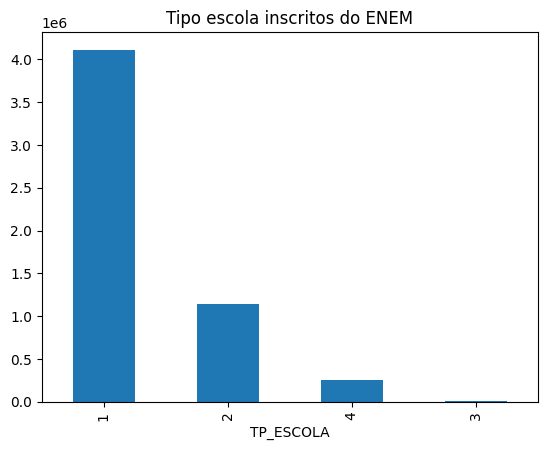

In [118]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola inscritos do ENEM')

<Axes: xlabel='TP_SEXO'>

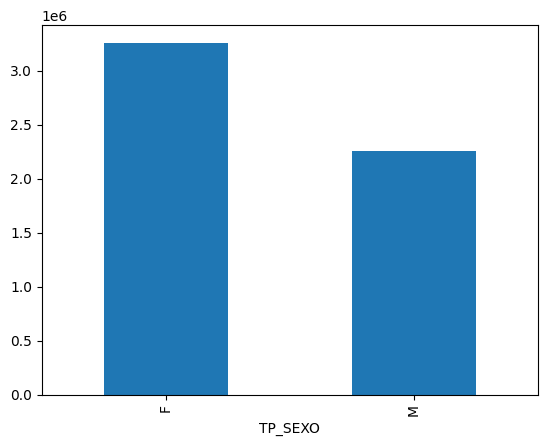

In [120]:
df.TP_SEXO.value_counts().plot(kind = 'bar')

### Melhoranso o plot


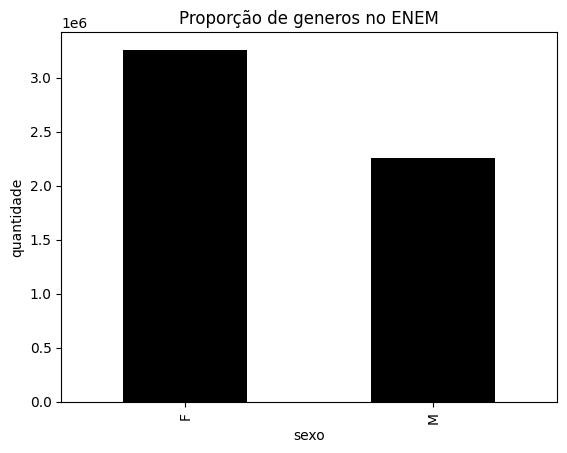

In [123]:
# grafico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')

# titulo
plt.title('Proporção de generos no ENEM')

# label do eixo x
plt.xlabel('sexo')

# label do eixo y
plt.ylabel('quantidade')

plt.show()


<Axes: ylabel='Municipio'>

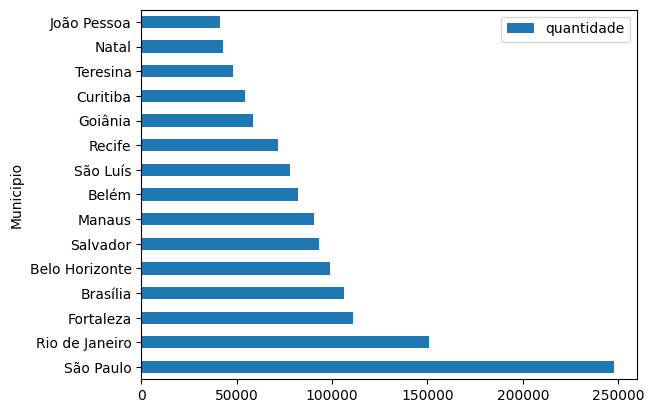

In [125]:
(df.NO_MUNICIPIO_PROVA
 .value_counts()
 .reset_index()
 .rename(columns = {'NO_MUNICIPIO_PROVA': 'Municipio','count': 'quantidade'})
 .nlargest(n = 15, columns = 'quantidade')
 .set_index('Municipio')
 .plot(
     kind = 'barh'
 )
)

In [127]:
# outra maneira sem usar parenteses 
df.NO_MUNICIPIO_PROVA\
.value_counts()

NO_MUNICIPIO_PROVA
São Paulo              247581
Rio de Janeiro         150866
Fortaleza              111056
Brasília               106304
Belo Horizonte          98780
                        ...  
Japurá                     84
Bonfim                     77
Jordão                     65
Santa Rosa do Purus        54
Fernando de Noronha        50
Name: count, Length: 1690, dtype: int64